In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

In [2]:
# Đọc file XML và lấy root element
tree = ET.parse('data.xml')
root = tree.getroot()

# Tạo một danh sách để lưu trữ các dictionary
fruits_data = []

# Duyệt qua từng phần tử <Fruit> trong <Fruits>
for fruit_elem in root.findall('Fruit'):
    fruit = {}
    for child in fruit_elem:
        fruit[child.tag] = child.text
    fruits_data.append(fruit)

# Tạo DataFrame từ danh sách các dictionary
df = pd.DataFrame(fruits_data)

# In ra DataFrame
print(df)

    Weight  Size   Color Sweetness Category
0      168  12.4   Green         5     Pear
1       96   6.3  Orange         9   Orange
2       95   6.4  Orange         8   Orange
3       93   6.2  Orange         8   Orange
4       95   6.2  Orange         9   Orange
..     ...   ...     ...       ...      ...
495     94   6.2  Orange         8   Orange
496    102   6.9     Red         4   Tomato
497    110   6.9     Red         4   Tomato
498    121   8.3  Yellow         6   Banana
499     99   6.2  Orange         9   Orange

[500 rows x 5 columns]


In [3]:
df.describe()

,Weight,Size,Color,Sweetness,Category
count,500,500,500,500,500
unique,62,53,4,6,5
top,100,6.8,Red,8,Orange
freq,17,28,159,119,115


In [4]:
#CountDistinct
df.nunique()

Weight       62
Size         53
Color         4
Sweetness     6
Category      5
dtype: int64

In [5]:
#Missing Values Calculation
df.isnull().sum()

Weight       0
Size         0
Color        0
Sweetness    0
Category     0
dtype: int64

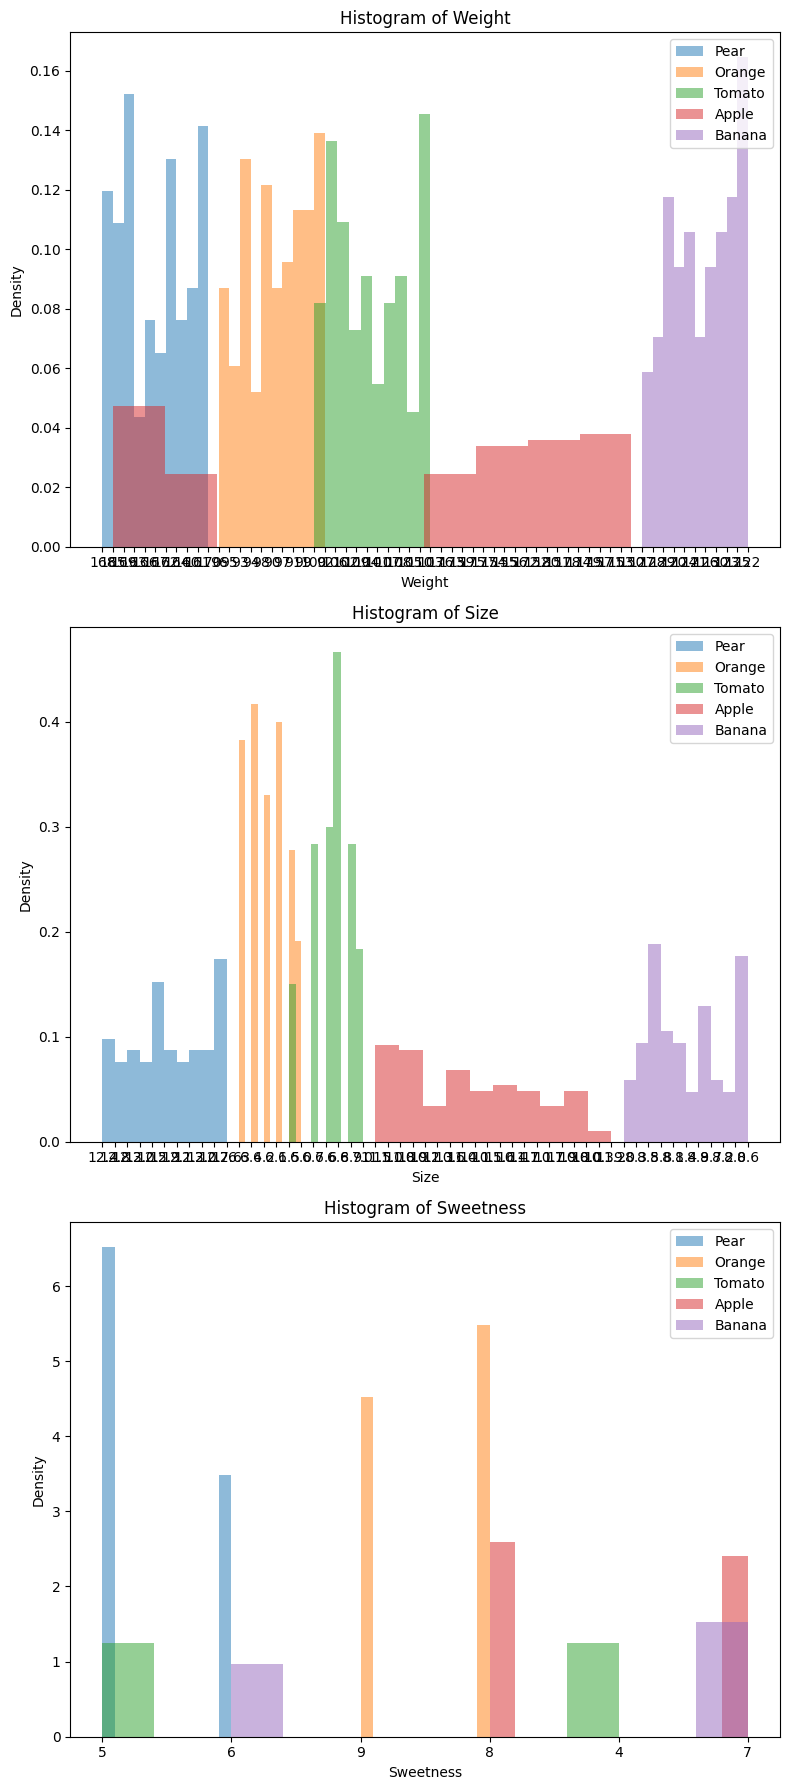

In [6]:
# Tạo lưới biểu đồ 3x1 cho Weight, Size, Sweetness
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 18))
# Biểu đồ cho Weight
for i, category in enumerate(df['Category'].unique()):
    subset = df[df['Category'] == category]
    axes[0].hist(subset['Weight'], bins=10, alpha=0.5, label=category, density=True)
    axes[0].set_title('Histogram of Weight')
    axes[0].set_xlabel('Weight')
    axes[0].set_ylabel('Density')
    axes[0].legend()

# Biểu đồ cho Size
for i, category in enumerate(df['Category'].unique()):
    subset = df[df['Category'] == category]
    axes[1].hist(subset['Size'], bins=10, alpha=0.5, label=category, density=True)
    axes[1].set_title('Histogram of Size')
    axes[1].set_xlabel('Size')
    axes[1].set_ylabel('Density')
    axes[1].legend()

# Biểu đồ cho Sweetness
for i, category in enumerate(df['Category'].unique()):
    subset = df[df['Category'] == category]
    axes[2].hist(subset['Sweetness'], bins=10, alpha=0.5, label=category, density=True)
    axes[2].set_title('Histogram of Sweetness')
    axes[2].set_xlabel('Sweetness')
    axes[2].set_ylabel('Density')
    axes[2].legend()

# Đảm bảo các biểu đồ không chồng lên nhau
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [8]:
# Tiền xử lý dữ liệu
X = df[['Weight', 'Size', 'Color', 'Sweetness']]
y = df['Category']

In [9]:
# Encode Color và nhãn Category thành số
encoder_color = LabelEncoder()
X['Color'] = encoder_color.fit_transform(X['Color'])

encoder_category = LabelEncoder()
y = encoder_category.fit_transform(y)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23996\2336571950.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Color'] = encoder_color.fit_transform(X['Color'])


In [10]:
# Normalize numerical data
scaler = StandardScaler()
X[['Weight', 'Size', 'Sweetness']] = scaler.fit_transform(X[['Weight', 'Size', 'Sweetness']])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23996\2219296000.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Weight', 'Size', 'Sweetness']] = scaler.fit_transform(X[['Weight', 'Size', 'Sweetness']])


In [11]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(len(encoder_category.classes_), activation='softmax')
])

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,805 (18.77 KB)

 Trainable params: 4,805 (18.77 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3335 - loss: 1.4912 - val_accuracy: 0.7900 - val_loss: 1.1794
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7073 - loss: 1.1310 - val_accuracy: 0.8500 - val_loss: 0.8449
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8150 - loss: 0.8724 - val_accuracy: 0.9600 - val_loss: 0.5834
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8890 - loss: 0.6252 - val_accuracy: 1.0000 - val_loss: 0.3830
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9525 - loss: 0.4383 - val_accuracy: 1.0000 - val_loss: 0.2426
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9682 - loss: 0.2781 - val_accuracy: 1.0000 - val_loss: 0.1565
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9927 - loss: 0.2094 - val_accuracy: 1.0000 - val_loss: 0.1021
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9801 - loss: 0.1665 - val_accuracy: 1.0000 - 

In [15]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

4/4 - 0s - 21ms/step - accuracy: 1.0000 - loss: 5.2050e-05

Test accuracy: 1.0


In [16]:
new_data = {
    'Weight': [110],
    'Size': [7.0],
    'Color': ['Red'],
    'Sweetness': [5]
}
new_df = pd.DataFrame(new_data)
# Tiền xử lý cho dòng dữ liệu mới
X_new = new_df[['Weight', 'Size', 'Color', 'Sweetness']]
X_new['Color'] = encoder_color.transform(X_new['Color'])
X_new[['Weight', 'Size', 'Sweetness']] = scaler.transform(X_new[['Weight', 'Size', 'Sweetness']])
# Dự đoán Category cho dòng mới
prediction = model.predict(X_new)
predicted_category = encoder_category.inverse_transform(prediction.argmax(axis=1))[0]
print("Predicted Category:", predicted_category)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
Predicted Category: Tomato


In [17]:
new_data = {
    'Weight': [150],
    'Size': [10.0],
    'Color': ['Red'],
    'Sweetness': [5]
}
new_df = pd.DataFrame(new_data)
# Tiền xử lý cho dòng dữ liệu mới
X_new = new_df[['Weight', 'Size', 'Color', 'Sweetness']]
X_new['Color'] = encoder_color.transform(X_new['Color'])
X_new[['Weight', 'Size', 'Sweetness']] = scaler.transform(X_new[['Weight', 'Size', 'Sweetness']])
# Dự đoán Category cho dòng mới
prediction = model.predict(X_new)
predicted_category = encoder_category.inverse_transform(prediction.argmax(axis=1))[0]
print("Predicted Category:", predicted_category)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Predicted Category: Pear
